In [364]:
%pylab notebook
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

Populating the interactive namespace from numpy and matplotlib


In [365]:
h=6.62607004e-34 #Plancks constant #m2 kg / s
k=1.38064852e-23 #Boltzmann constant #m2 kg s-2 K-1

In [366]:
#Model data

def mbb(nu,T,A):
    x=h*nu*1e9/(k*T)
    Inu=A*(nu**3.)/(exp(x)-1.)
    return Inu

def multitemp_mbb_spectra(nu,T1,A1,T2,A2):
    Inu=mbb(nu,T1,A1) + mbb(nu,T2,A2)
    return Inu

In [391]:
# Moment expansion for a grey black body fit
def y1(x):
    return x*exp(x)/(exp(x)-1.) 

def y2(x):
    return y1(x)*x*cosh(0.5*x)/sinh(0.5*x)

def y3(x):
    return y1(x)*x*x*(cosh(x)+2)/(cosh(x)-1)

def y4(x):
    return y2(x)*0.5*x*x*(cosh(x)+5)/(sinh(0.5*x)**2.)

def y5(x):
    return y1(x)*(x**4.)*(33.+26*cosh(x)+cosh(2.*x))/(8.*sinh(0.5*x)**4.)

def f_gb(nu,T,A0,p22,p222,p2222,p22222):
    beta=1./T
    x=h*nu*1e9*beta/k
    I0=A0*(nu**3.)/(exp(x)-1.)
    temp=I0*(1. + 0.5*p22*y2(x) + p222*y3(x)/6. + p2222*y4(x)/24. + p22222*y5(x)/120.)
    return temp

In [575]:
T1=15 ; A1=1e-8 ; T2=400 ; A2 = 1e-10

nu=linspace(100,5000,100)
Inu=multitemp_mbb_spectra(nu,T1,A1,T2,A2)

In [576]:
fitp,fitcov=curve_fit(multitemp_mbb_spectra,nu,Inu,bounds=((1e2, 1e-12,1e2,1e-12), (8e2,1e-8,8e2,1e-8)))
#fitp,fitcov=curve_fit(multitemp_mbb_spectra,nu,multitemp_mbb_spectra(nu,T1=T1,A1=A1,T2=T2,A2=A2),sigma=sigma)
fitp

array([  1.00042196e+02,   8.74494164e-11,   4.72259001e+02,
         7.41623110e-11])

<IPython.core.display.Javascript object>


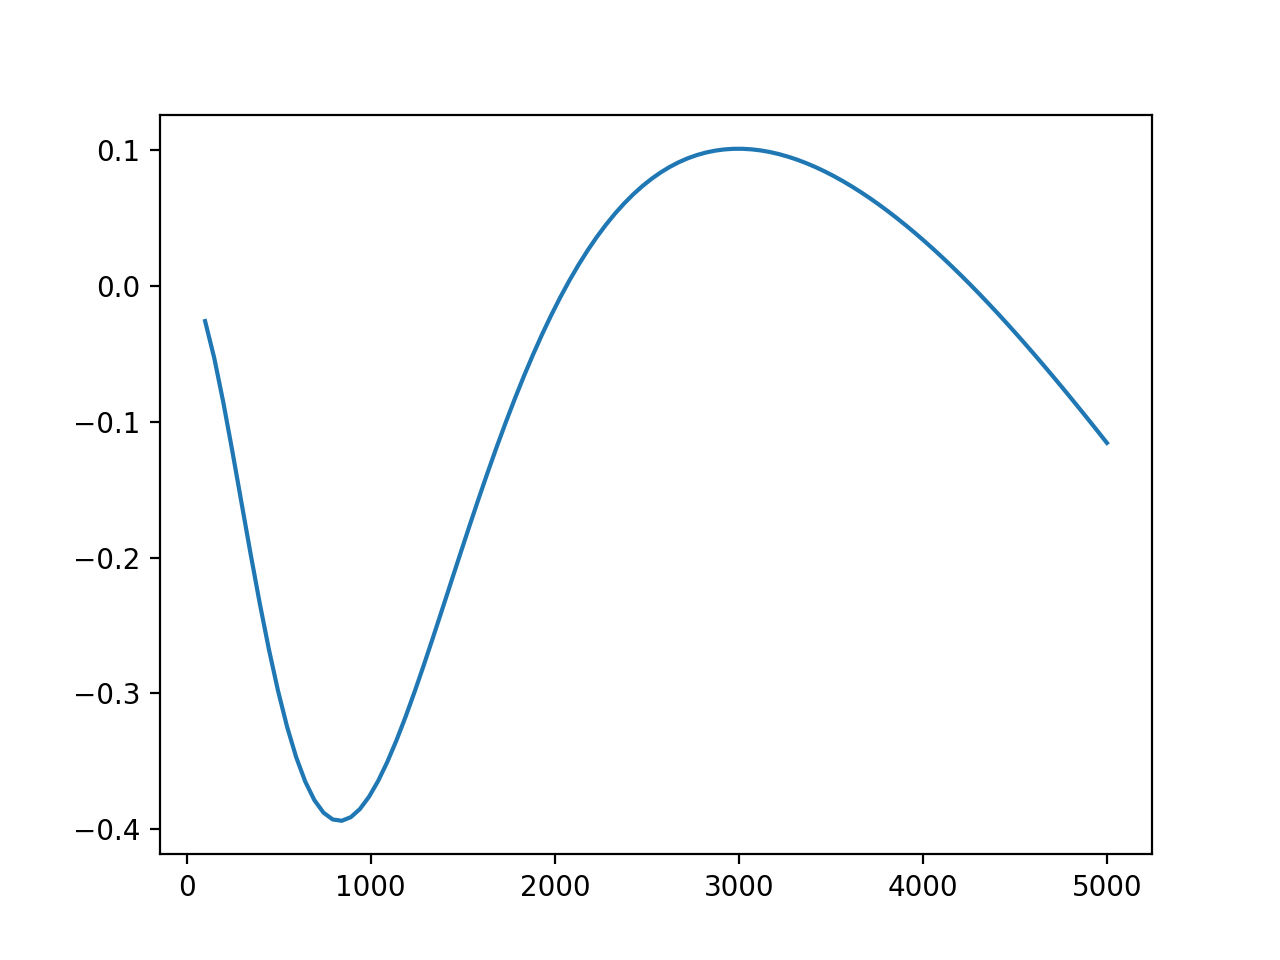

<IPython.core.display.Javascript object>


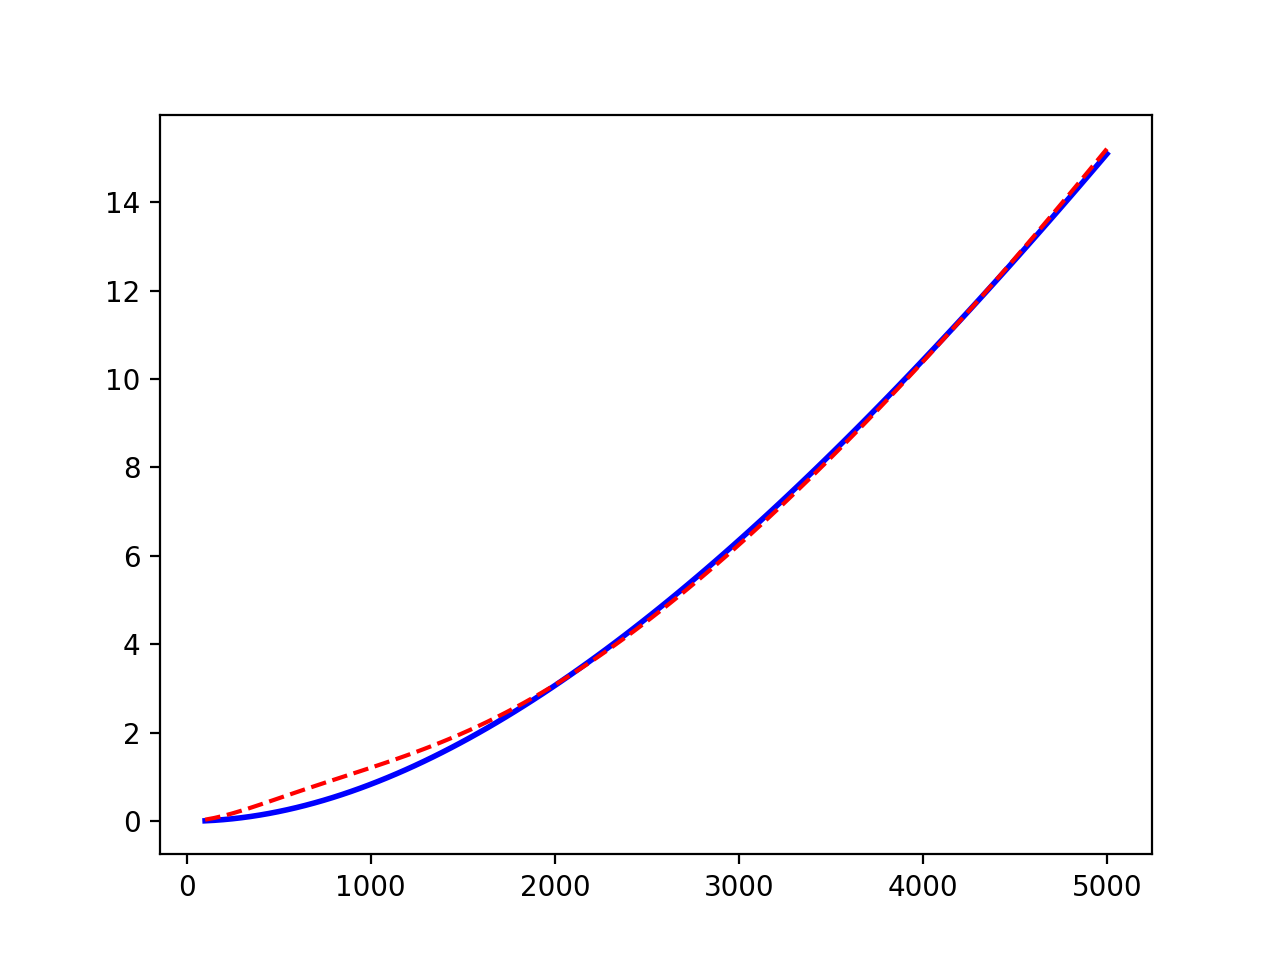

In [577]:
figure()
plot(nu,multitemp_mbb_spectra(nu,T1=fitp[0],A1=fitp[1],T2=fitp[2],A2=fitp[3])-Inu)

figure()
plot(nu,multitemp_mbb_spectra(nu,T1=fitp[0],A1=fitp[1],T2=fitp[2],A2=fitp[3]),"b-",lw=2)
plot(nu,Inu,"r--")

In [578]:
p0=(1000,1e-5)
lb=(0., 0.) ; ub=(5e3,1.)
fitp0, fotcov=curve_fit(lambda x, T, A0: f(x, T, A0, p22=0., p222=0.,p2222=0.,p22222=0.), nu,Inu,p0,bounds=(lb,ub))
print fitp0

p0=(fitp0[0],fitp0[1],0.)
fitp1, fotcov=curve_fit(lambda x, T, A0, p22: f(x, T, A0, p22, p222=0,p2222=0,p22222=0), nu,Inu,p0)
print fitp1

p0=(fitp1[0],fitp1[1],fitp1[2],0.)
fitp2, fotcov=curve_fit(lambda x, T, A0, p22,p222: f(x, T, A0, p22, p222,p2222=0,p22222=0), nu,Inu,p0)
print fitp2

p0=(fitp2[0],fitp2[1],fitp2[2],fitp2[3],0.)
fitp3, fotcov=curve_fit(lambda x, T, A0, p22,p222,p2222: f(x, T, A0, p22, p222,p2222,p22222=0), nu,Inu,p0)
print fitp3

p0=append(fitp2,0.)
fitp4, fotcov=curve_fit(lambda x, T, A0, p22,p222,p2222,p22222: f(x, T, A0, p22, p222,p2222,p22222), nu,Inu,p0)
print fitp4

[  3.37230244e+02   1.25118551e-10]
[  1.50158525e+02   1.56214218e-10   8.48845139e-01]
[  5.17502714e+01   1.15078111e-09  -7.45826267e-01   1.00982638e+00]
[  5.00453655e+01   1.17055137e-09  -6.37716578e-01   7.81773268e-01
   1.46051342e-01]
[  3.53130782e+01   4.10491116e-09  -1.28950944e+00   2.21849301e+00
  -1.87023072e+00   8.58376898e-01]


In [581]:
p0=append(fitp2,0.)

p0

array([  5.17502714e+01,   1.15078111e-09,  -7.45826267e-01,
         1.00982638e+00,   0.00000000e+00])

<IPython.core.display.Javascript object>


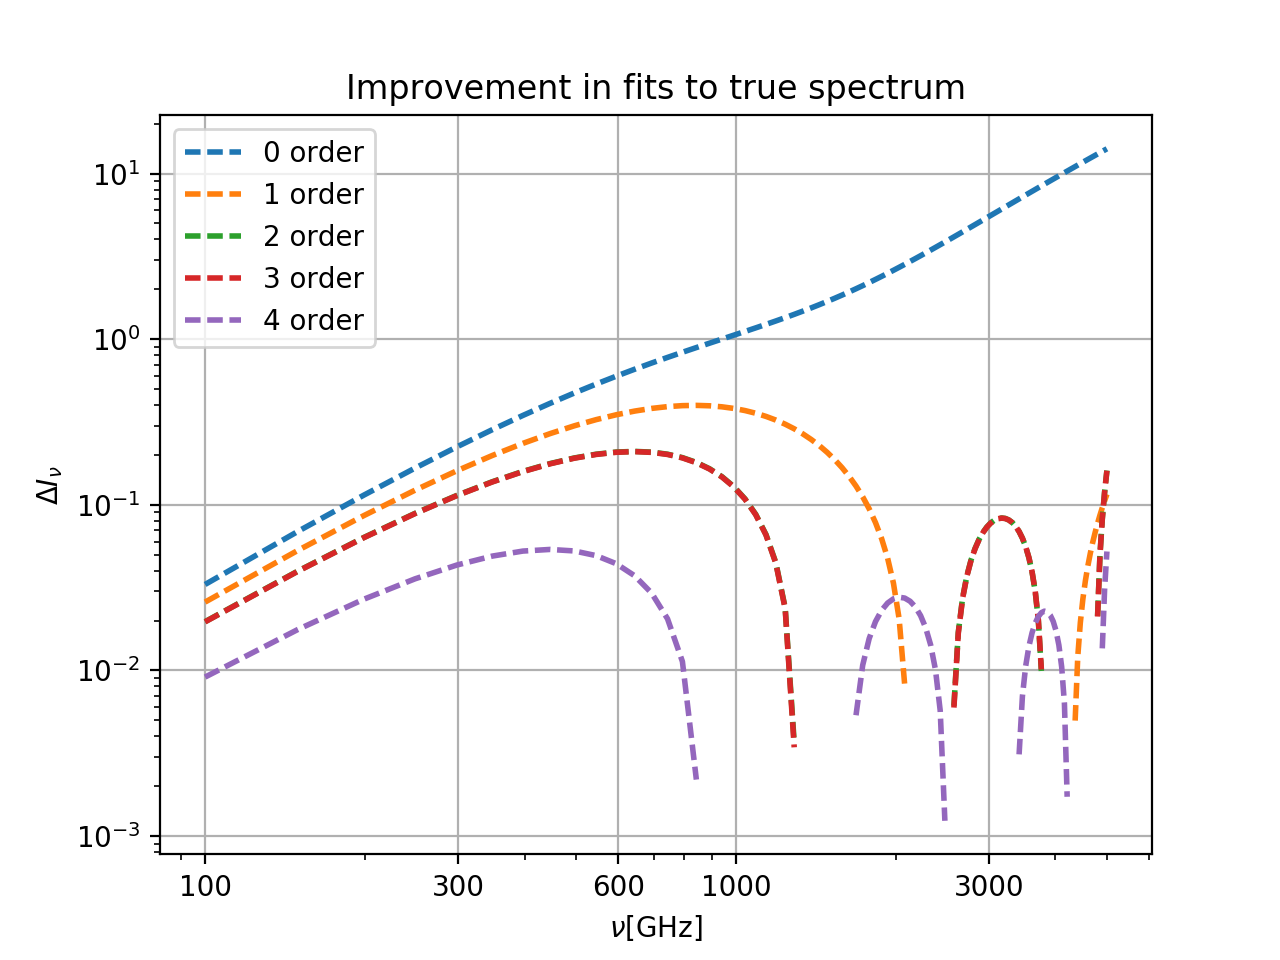

<IPython.core.display.Javascript object>


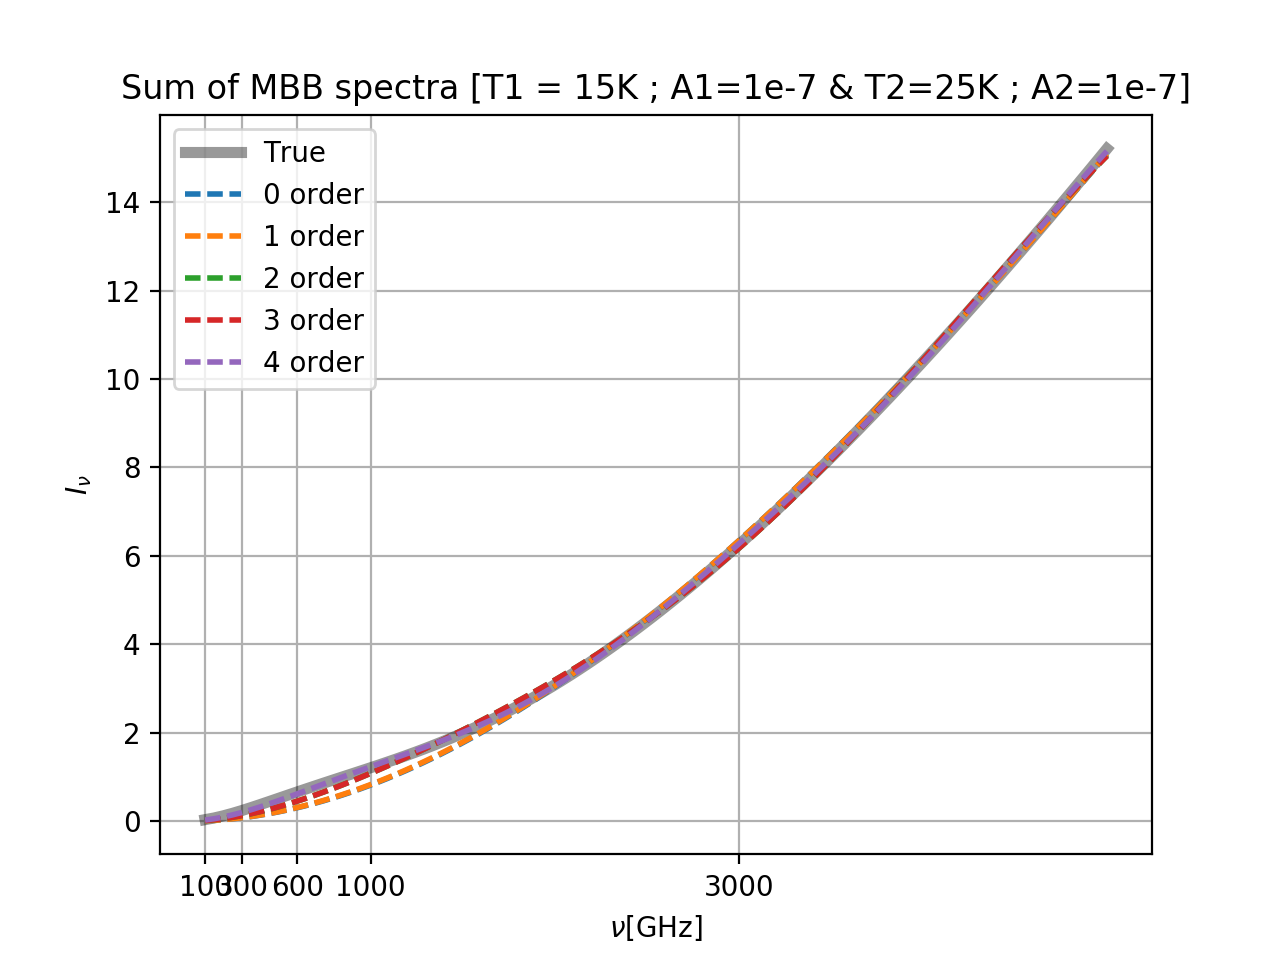

In [579]:
figure()
title("Improvement in fits to true spectrum")
pllabel="0 order"
plot(nu,Inu-f(nu,T=fitp[0],A0=fitp[1],p22=0., p222=0., p2222=0., p22222=0.),"--",lw=2,label=pllabel)
pllabel="1 order"
plot(nu,Inu-f(nu,T=fitp1[0],A0=fitp1[1],p22=fitp1[2], p222=0., p2222=0., p22222=0.),"--",lw=2,label=pllabel)
pllabel="2 order"
plot(nu,Inu-f(nu,T=fitp2[0],A0=fitp2[1],p22=fitp2[2], p222=fitp2[3], p2222=0., p22222=0.),"--",lw=2,label=pllabel)
pllabel="3 order"
plot(nu,Inu-f(nu,T=fitp3[0],A0=fitp3[1],p22=fitp3[2], p222=fitp3[3], p2222=fitp3[4], p22222=0.),"--",lw=2,label=pllabel)
pllabel="4 order"
plot(nu,Inu-f(nu,T=fitp4[0],A0=fitp4[1],p22=fitp4[2], p222=fitp4[3], p2222=fitp4[4], p22222=fitp4[5]),"--",lw=2,label=pllabel)
loglog()
ylabel(r"$\Delta I_{\nu}$")
xlabel(r"$\nu$[GHz]")
xticks([100,300,600,1000,3000],[100,300,600,1000,3000])
grid()
legend(loc=0)
savefig("improvement_in_deltainu_with_taylor_order.pdf",dpi=150,bbox_inches="tight")


figure()
title("Sum of MBB spectra [T1 = 15K ; A1=1e-7 & T2=25K ; A2=1e-7]")
pllabel="True"
plot(nu,Inu,"k-",lw=4,alpha=0.4,label=pllabel)
pllabel="0 order"
plot(nu,f(nu,T=fitp0[0],A0=fitp0[1],p22=0., p222=0., p2222=0., p22222=0.),"--",lw=2,label=pllabel)
pllabel="1 order"
plot(nu,f(nu,T=fitp1[0],A0=fitp1[1],p22=fitp1[2], p222=0., p2222=0., p22222=0.),"--",lw=2,label=pllabel)
pllabel="2 order"
plot(nu,f(nu,T=fitp2[0],A0=fitp2[1],p22=fitp2[2], p222=fitp2[3], p2222=0., p22222=0.),"--",lw=2,label=pllabel)
pllabel="3 order"
plot(nu,f(nu,T=fitp3[0],A0=fitp3[1],p22=fitp3[2], p222=fitp3[3], p2222=fitp3[4], p22222=0.),"--",lw=2,label=pllabel)
pllabel="4 order"
plot(nu,f(nu,T=fitp4[0],A0=fitp4[1],p22=fitp4[2], p222=fitp4[3], p2222=fitp4[4], p22222=fitp4[5]),"--",lw=2,label=pllabel)
ylabel(r"$I_{\nu}$")
xlabel(r"$\nu$[GHz]")
xticks([100,300,600,1000,3000],[100,300,600,1000,3000])
grid()
#semilogx()
legend(loc=0)
savefig("improvement_in_inu_with_taylor_order.pdf",dpi=150,bbox_inches="tight")

# Analysis on Colin hill data

<IPython.core.display.Javascript object>


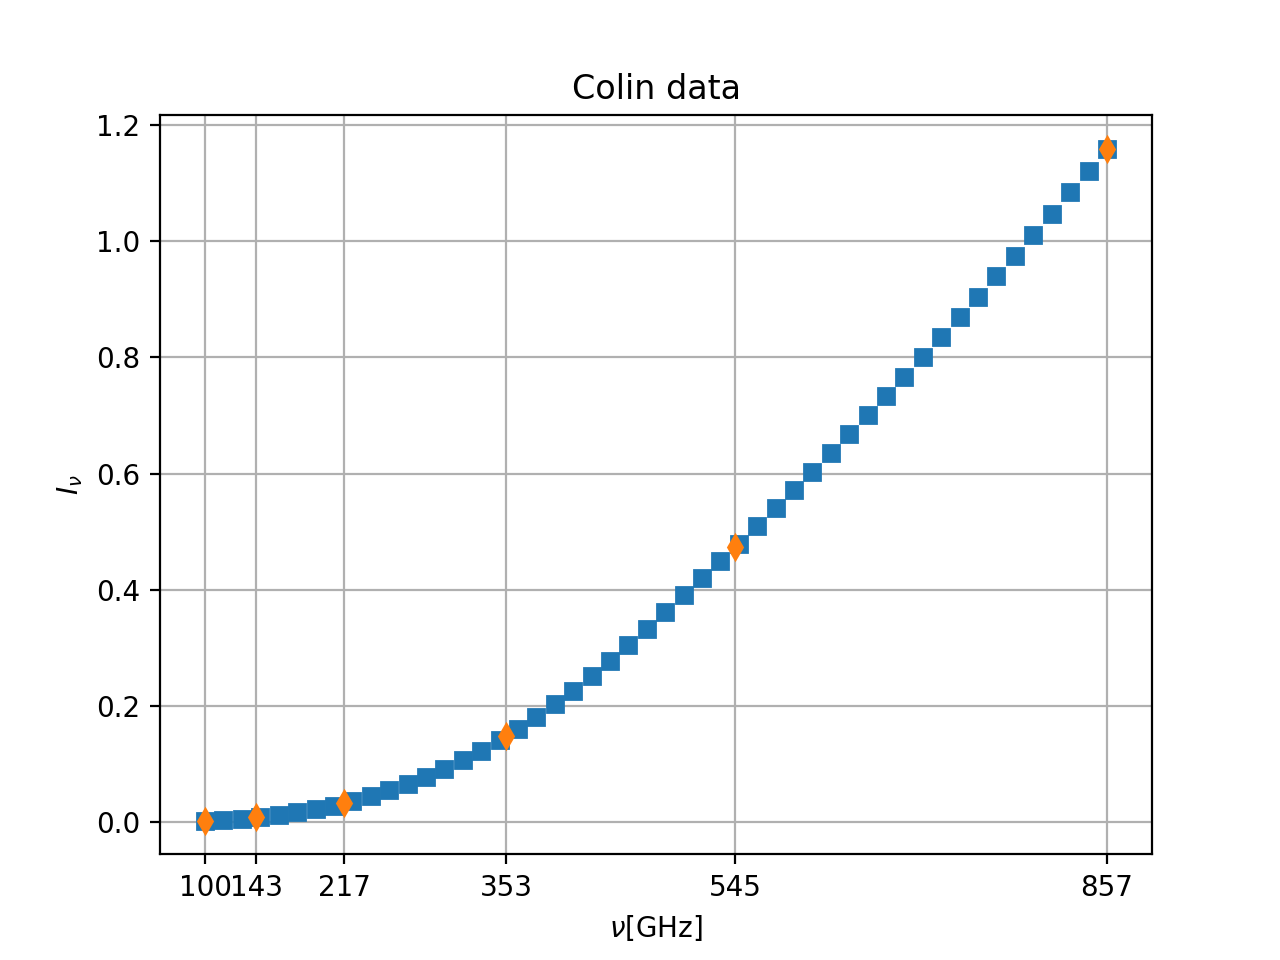

In [543]:
#nu=linspace(min(data_nu),max(data_nu),1000)
#data_interp=interp1d(data_nu,data_Inu,kind="linear")
#Inu=data_interp(nu)

data=loadtxt("./data.txt")
nu=data[:,0]
Inu=data[:,1]

#sigma=zeros(size(nu),float)
nu=linspace(min(data[:,0]),max(data[:,0]),50)
fn=interp1d(data[:,0],data[:,1],kind="quadratic")
#Inu=log(fn(nu))
Inu=fn(nu)

figure()
title("Colin data")
ylabel(r"$I_{\nu}$")
xlabel(r"$\nu$[GHz]")
xticks([100,200,400,600,800],[100,200,400,600,800])
grid()
legend(loc=0)
plot(nu,Inu,"s")
plot(data[:,0],data[:,1],"d")
xticks([100,143,217,353,545,857],[100,143,217,353,545,857])

savefig("colin_data.pdf",dpi=150, bbox_inches="tight")

In [350]:
def f(nu,T,p22,p222,p2222,p22222):
    A0=1e-11
    beta=1./T
    x=h*nu*1e9*beta/k
    I0=A0*(nu**3.)/(exp(x)-1.)
    temp=I0*(1. + 0.5*p22*y2(x) + p222*y3(x)/6. + p2222*y4(x)/24. + p22222*y5(x)/120.)
    return temp

In [351]:
method="dogbox"
p0=(150.)
lb=(0.) ; ub=(30000)
fitp0, fotcov=curve_fit(lambda x, T: f(x,T,p22=0.,p222=0.,p2222=0.,p22222=0.),nu,Inu,p0,bounds=(lb,ub),method=method)
print fitp0

p0=(fitp0[0],0.0)
lb=(0.,-50.) ; ub=(300000,50.)
fitp1, fotcov=curve_fit(lambda x, T, p22: f(x, T, p22, p222=0.,p2222=0,p22222=0), nu,Inu,p0,bounds=(lb,ub),method=method)
print fitp1

p0=(fitp1[0],fitp1[1],0.)
lb=(0.,-50.,-50.) ; ub=(300000,50.,50.)
fitp2, fotcov=curve_fit(lambda x, T, p22,p222: f(x, T, p22, p222,p2222=0,p22222=0), nu,Inu,p0,bounds=(lb,ub),method=method)
print fitp2

p0=(fitp2[0],fitp2[1],fitp2[2],0.)
lb=(0.,-50.,-50.,-50.) ; ub=(30000,50.,50.,50.)
fitp3, fotcov=curve_fit(lambda x, T, p22,p222,p2222: f(x, T, p22, p222,p2222,p22222=0), nu,Inu,p0,bounds=(lb,ub),method=method)
print fitp3

p0=(fitp3[0],fitp3[1],fitp3[2],fitp3[3],0.5)
lb=(0.,-50.,-50.,-50.,-50.) ; ub=(30000,50.,50.,50.,50.)
fitp4, fotcov=curve_fit(f,nu,Inu,p0,bounds=(lb,ub),method=method)
print fitp4

[ 7636.75042743]
[  7.62929266e+03   9.75989088e-04]
[  7.62095641e+03  -1.93242304e-01   1.95312975e-01]
[  7.61832991e+03  -4.11619536e+00  -4.58813873e+01   5.00000000e+01]
[  7.61835948e+03  -1.85708863e+00   3.90646822e+01   1.27948198e+01
  -5.00000000e+01]


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


<IPython.core.display.Javascript object>


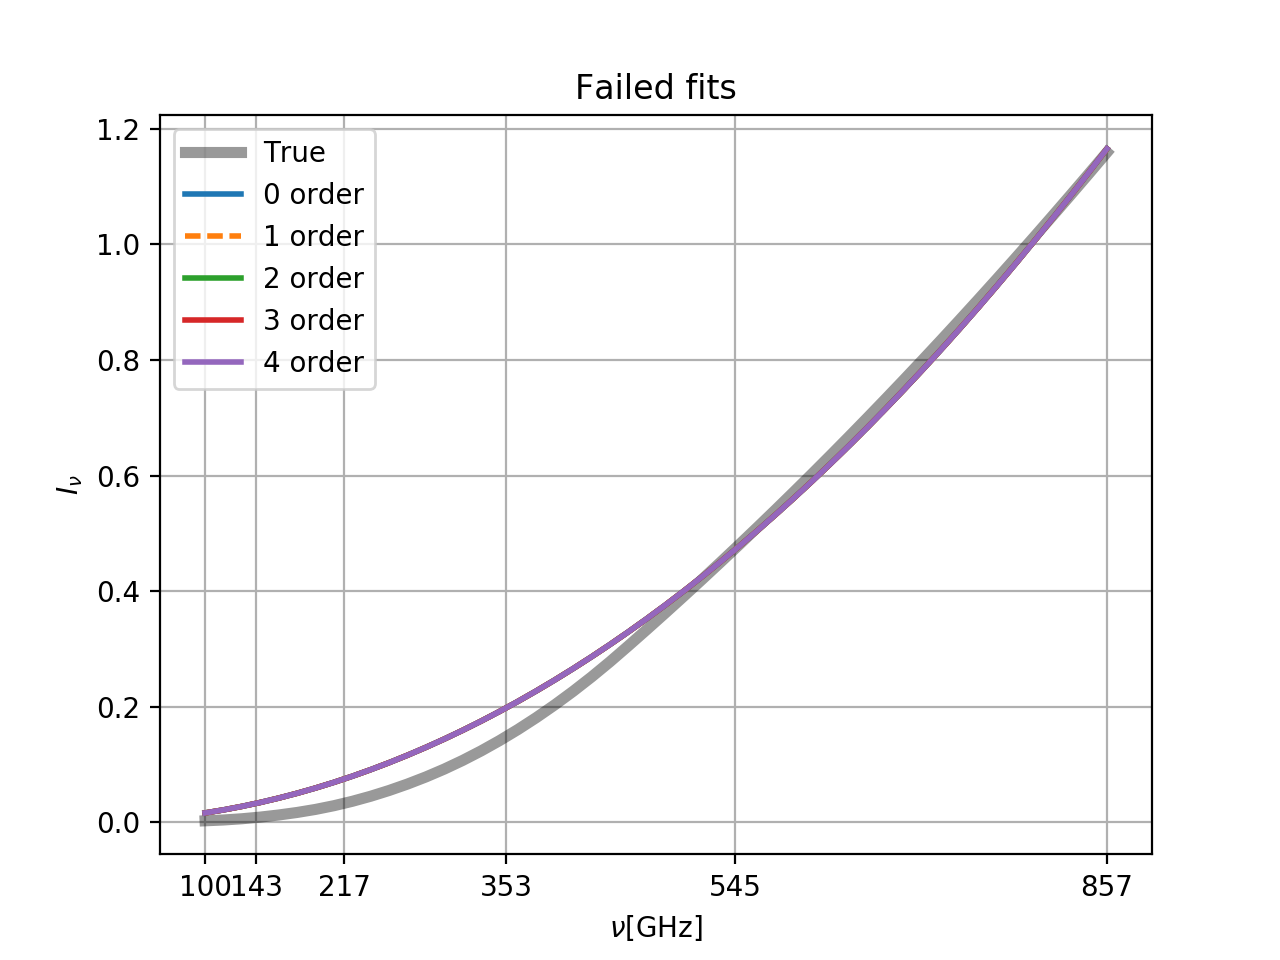

In [352]:
figure()
title("Failed fits")
pllabel="True"
plot(nu,Inu,"k-",lw=4,alpha=0.4,label=pllabel)
pllabel="0 order"
plot(nu,f(nu,T=fitp0[0],p22=0., p222=0., p2222=0., p22222=0.),lw=2,label=pllabel)
pllabel="1 order"
plot(nu,f(nu,T=fitp1[0],p22=fitp1[1], p222=0., p2222=0., p22222=0.),"--",lw=2,label=pllabel)
pllabel="2 order"
plot(nu,f(nu,T=fitp2[0],p22=fitp2[1], p222=fitp2[2], p2222=0., p22222=0.),"-",lw=2,label=pllabel)
pllabel="3 order"
plot(nu,f(nu,T=fitp3[0],p22=fitp3[1], p222=fitp3[2], p2222=fitp3[3], p22222=0.),"-",lw=2,label=pllabel)
pllabel="4 order"
plot(nu,f(nu,T=fitp4[0],p22=fitp4[1], p222=fitp4[2], p2222=fitp4[3], p22222=fitp4[4]),"-",lw=2,label=pllabel)
legend(loc=0)
ylabel(r"$I_{\nu}$")
xlabel(r"$\nu$[GHz]")
grid()
legend(loc=0)
xticks([100,143,217,353,545,857],[100,143,217,353,545,857])
savefig("improvement_in_inu_with_taylor_order_colin_data.pdf",dpi=150,bbox_inches="tight")

<IPython.core.display.Javascript object>


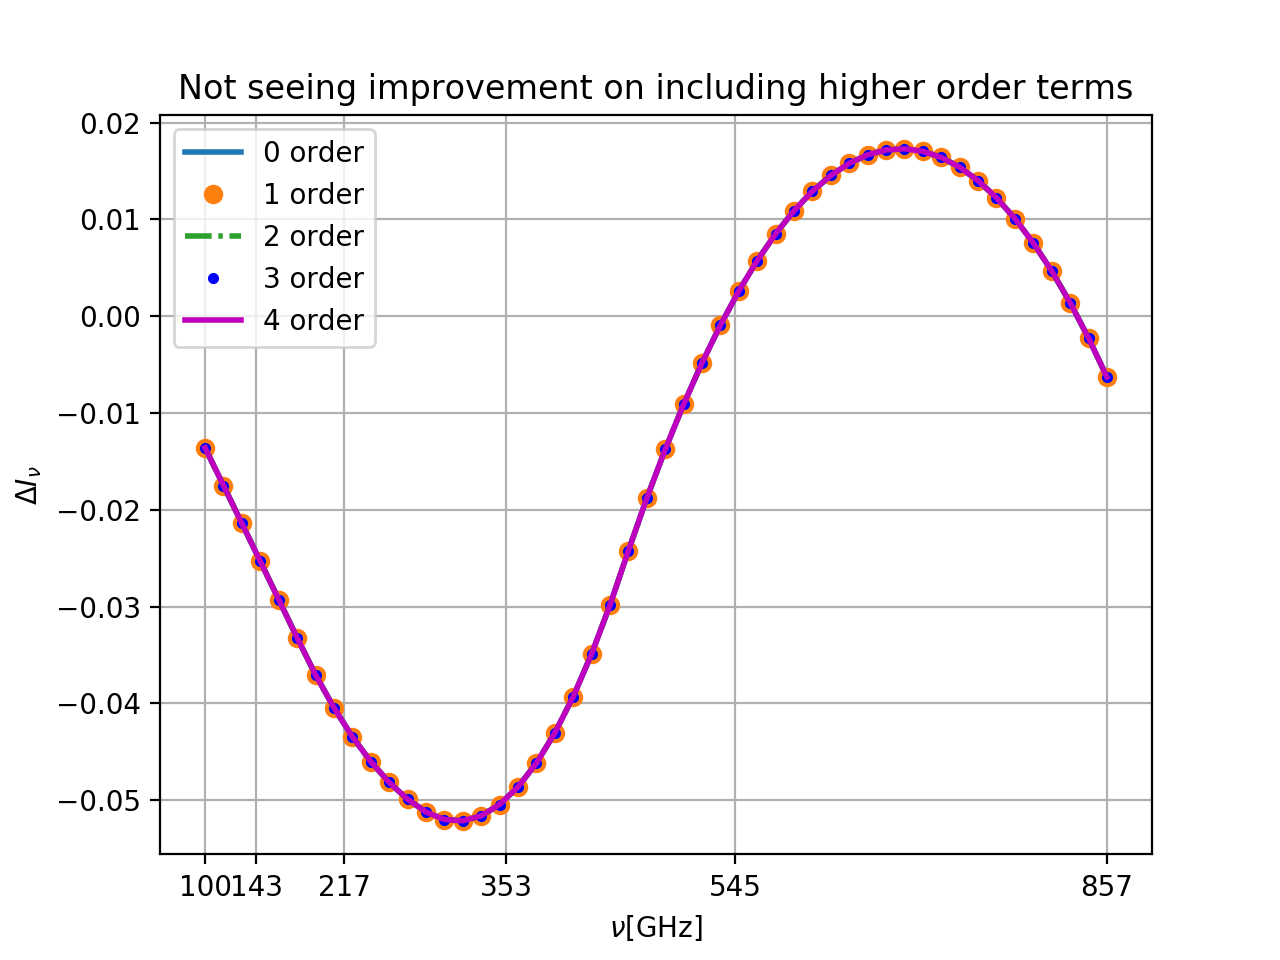

In [358]:
figure()
title("Not seeing improvement on including higher order terms")
pllabel="0 order"
plot(nu,Inu-f(nu,T=fitp0[0],p22=0., p222=0., p2222=0., p22222=0.),lw=2,label=pllabel)
pllabel="1 order"
plot(nu,Inu-f(nu,T=fitp1[0],p22=fitp1[1], p222=0., p2222=0., p22222=0.),"o",lw=2,label=pllabel)
pllabel="2 order"
plot(nu,Inu-f(nu,T=fitp2[0],p22=fitp2[1], p222=fitp2[2], p2222=0., p22222=0.),"-.",lw=2,label=pllabel)
pllabel="3 order"
plot(nu,Inu-f(nu,T=fitp3[0],p22=fitp3[1], p222=fitp3[2], p2222=fitp3[3], p22222=0.),"b.",lw=2,label=pllabel)
pllabel="4 order"
plot(nu,Inu-f(nu,T=fitp4[0],p22=fitp4[1], p222=fitp4[2], p2222=fitp4[3], p22222=fitp4[4]),"m-",lw=2,label=pllabel)
legend(loc=0)
#loglog()
ylabel(r"$\Delta I_{\nu}$")
xlabel(r"$\nu$[GHz]")
xticks([100,143,217,353,545,857],[100,143,217,353,545,857])
grid()
legend(loc=0)
savefig("improvement_in_deltainu_with_taylor_order_colin_data.pdf",dpi=150,bbox_inches="tight")